## Extracting all Images 

### Import all libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [4]:
data_file = '/content/drive/MyDrive/AdvancedML/mnist.csv'

In [5]:
digits_df = pd.read_csv(data_file)

In [6]:
digits_df.head( 11)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
digits_df.shape

(42000, 785)

In [8]:
digits_df.label.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6])

### For reading into numpy arrays

In [11]:
labels = digits_df.iloc[0:,0].astype(np.int32)
image_buffer = digits_df.iloc[0:,1:].values
labels_np = np.array( labels )

In [12]:
labels_np[0:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3], dtype=int32)

In [13]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [14]:
image_buffer.shape

(42000, 784)

In [15]:
dataset = zip(labels, image_buffer)

The images are 28 x 28 pixel images

### Verifying images

In [16]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


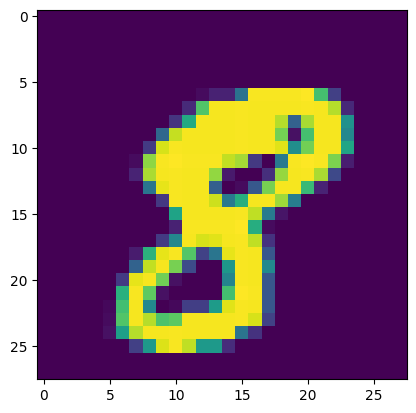

In [17]:
print_image( 10 )

### How images actually look like?

In [18]:
np.set_printoptions(precision=4, linewidth=120)

In [19]:
image_buffer[8].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,  41, 149, 156, 179, 254, 254, 201, 119,  46,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  13, 147, 241, 253, 253, 254, 253, 253, 253, 253, 245, 160,   0,   0],
       [  0,   0,   0,   0,   0,  31, 224, 253, 253, 180, 174, 175, 174, 174, 174, 174, 223, 247, 145,   6],
       [  0,   0,   0,   0,   7, 197, 254, 253, 165,   2,   0,   0,   0,   0,   0,   0,  12, 102, 184,  16],
       [  0,   0,   0,   0, 152, 253, 254, 162,  18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 235, 254, 158,  15,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  74, 250, 253,  15,   0,   0,   0,  16,  20,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   7, 199, 253, 253,   0,   0,  25, 130, 235, 254, 247, 145,   6,   0,   0,   0,   0,   0],
       [  0,   0,  20, 253, 253, 177, 100, 219, 240, 253, 253, 254, 253, 253, 125,   0,   0,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [20]:
image_buffer.shape

(42000, 784)

### Reshaping all images

In [21]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [22]:
reshaped_images.shape

(42000, 28, 28)

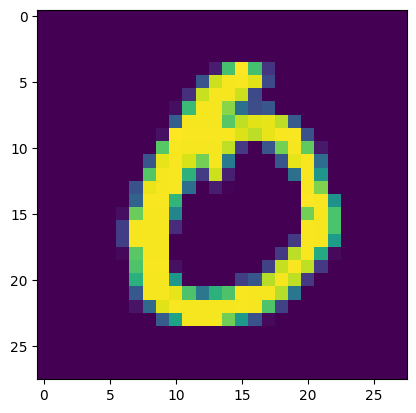

In [23]:
plt.imshow(reshaped_images[200]);

## Classifying Digits

### Importing all required libraries

In [24]:
import tensorflow as tf
from tensorflow import keras

In [25]:
print(tf.__version__)
print(keras.__version__)

2.12.0
2.12.0


### Set X and Y

In [26]:
X = reshaped_images

In [27]:
y = keras.utils.to_categorical( labels_np )

In [28]:
y[0:10]

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Splitting datasets into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [31]:
X_train.shape

(33600, 28, 28)

In [32]:
X_test.shape

(8400, 28, 28)

In [33]:
y_train.shape

(33600, 10)

In [34]:
y_test.shape

(8400, 10)

In [35]:
input_shape = X_train.shape[-2:]

In [ ]:
print(input_shape)

(28, 28)


### Train a model

In [36]:
# import necessary building blocks
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

### Neural Networks Architecture 

- Layer
- Neurons
- Activation

In [38]:
model = Sequential()

# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Flatten(input_shape=input_shape))
model.add(Dense(64))


model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

### Explain number of parameters need to be trainined

- All the links (compute)

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 64)                50240     
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 activation_5 (Activation)   (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 activation_6 (Activation)   (None, 16)               

### Loss Function

In [40]:
x_list = list(np.arange(0.0001, 10, 0.001))

In [41]:
y_list = [np.log(x) for x in x_list]

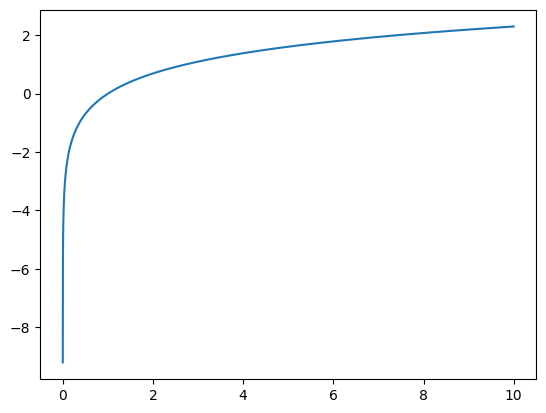

In [42]:
plt.plot(x_list, y_list)

### Gradient Descent

- Learning Rate
- Optimizers

In [43]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### Training Model

- Epochs
- Batch Size

In [44]:
EPOCHS = 20
BATCH_SIZE = 128

In [45]:
%%time 
# fit model
history = model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.3,
    shuffle = True,
    verbose=1,
)

Epoch 1/20
184/184 [==============================] - 2s 7ms/step - loss: 5.2404 - accuracy: 0.4865 - val_loss: 1.3521 - val_accuracy: 0.6008
Epoch 2/20
184/184 [==============================] - 1s 7ms/step - loss: 1.0280 - accuracy: 0.6830 - val_loss: 0.9424 - val_accuracy: 0.7299
Epoch 3/20
184/184 [==============================] - 1s 8ms/step - loss: 0.7539 - accuracy: 0.7699 - val_loss: 0.7527 - val_accuracy: 0.7922
Epoch 4/20
184/184 [==============================] - 1s 8ms/step - loss: 0.5752 - accuracy: 0.8335 - val_loss: 0.6146 - val_accuracy: 0.8372
Epoch 5/20
184/184 [==============================] - 1s 7ms/step - loss: 0.4629 - accuracy: 0.8674 - val_loss: 0.5555 - val_accuracy: 0.8594
Epoch 6/20
184/184 [==============================] - 1s 6ms/step - loss: 0.3938 - accuracy: 0.8893 - val_loss: 0.5101 - val_accuracy: 0.8704
Epoch 7/20
184/184 [==============================] - 1s 6ms/step - loss: 0.3327 - accuracy: 0.9041 - val_loss: 0.4705 - val_accuracy: 0.8852
Epoch 

In [47]:
# summarize history for accuracy

def plot_train_val_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [48]:
# summarize history for loss

def plot_train_val_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

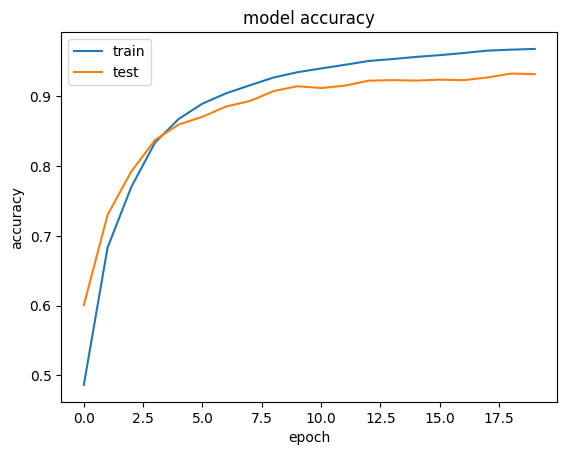

In [49]:
plot_train_val_accuracy(history.history)

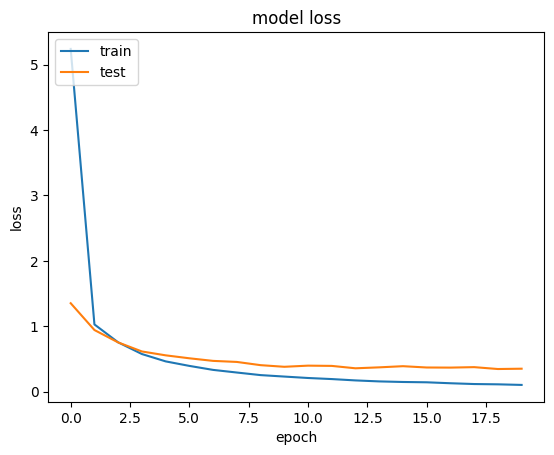

In [50]:
plot_train_val_loss(history.history)

### Predict and Evaluate

In [51]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

263/263 [==============================] - 1s 2ms/step - loss: 0.3068 - accuracy: 0.9362

Test accuracy:  0.9361904859542847


In [52]:
predictions = model.predict(X_test)
pred_labels = np.argmax(predictions, axis=1)

263/263 [==============================] - 0s 2ms/step


In [53]:
np.round(predictions, 2)

array([[0.  , 0.  , 0.03, ..., 0.  , 0.97, 0.  ],
       [0.  , 1.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 1.  ]], dtype=float32)

In [54]:
pred_labels

array([8, 1, 9, ..., 3, 0, 9])

### Verifying Predictions

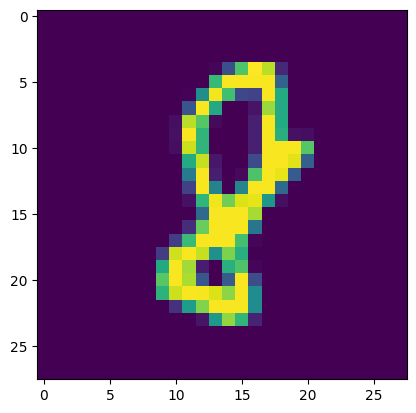

In [55]:
plt.imshow(X_test[0])

In [56]:
pred_labels[0]

8

In [57]:
len(X_test)

8400

### Randomly show a set of images and predictions

In [58]:
import random 

all_indexes = list(range(len(X_test)))
test_indexes = random.sample( all_indexes, 15 )

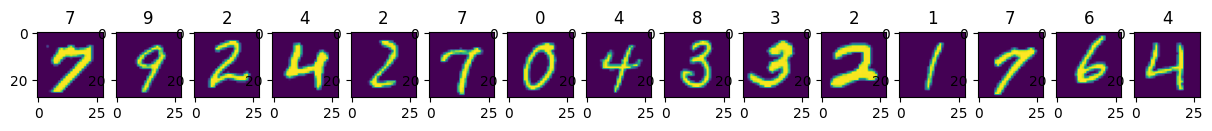

In [59]:
k = 1
plt.figure( figsize=(15, 6))
for i in test_indexes:
    plt.subplot(1, 15, k);
    plt.imshow(X_test[i])
    plt.title(str(pred_labels[i]))
    k = k + 1
plt.show()

### Confusion Matrix

In [60]:
np_label_list = list(np.unique(labels_np))

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
predictions = model.predict(X_test)
y_pred_classes = np.argmax(predictions, axis=1)

263/263 [==============================] - 0s 2ms/step


In [63]:
y_actual_classes = np.argmax(y_test, axis=1)

In [64]:
y_pred_classes

array([8, 1, 9, ..., 3, 0, 9])

In [65]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [66]:
confusion_matrix(y_actual_classes, y_pred_classes)

array([[786,   0,   1,   3,   3,  16,   2,   1,   4,   0],
       [  0, 883,  11,   5,   3,   0,   1,   1,   3,   2],
       [  5,   6, 773,  11,  10,   2,   0,   9,  29,   1],
       [  2,   3,   6, 860,   0,  22,   1,   4,  35,   4],
       [  4,   0,   1,   0, 797,   1,   6,   4,   2,  24],
       [  3,   0,   0,  24,   0, 646,   5,   1,  10,  13],
       [  9,   2,   6,   3,   5,  21, 721,   2,  15,   1],
       [  0,   5,   6,  10,   6,   6,   0, 840,   5,  15],
       [  3,   1,   3,  16,   4,  14,   0,   1, 786,   7],
       [  3,   1,   0,   8,  24,  12,   1,   6,  11, 772]])

In [67]:
import seaborn as sn

In [68]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, labels = np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

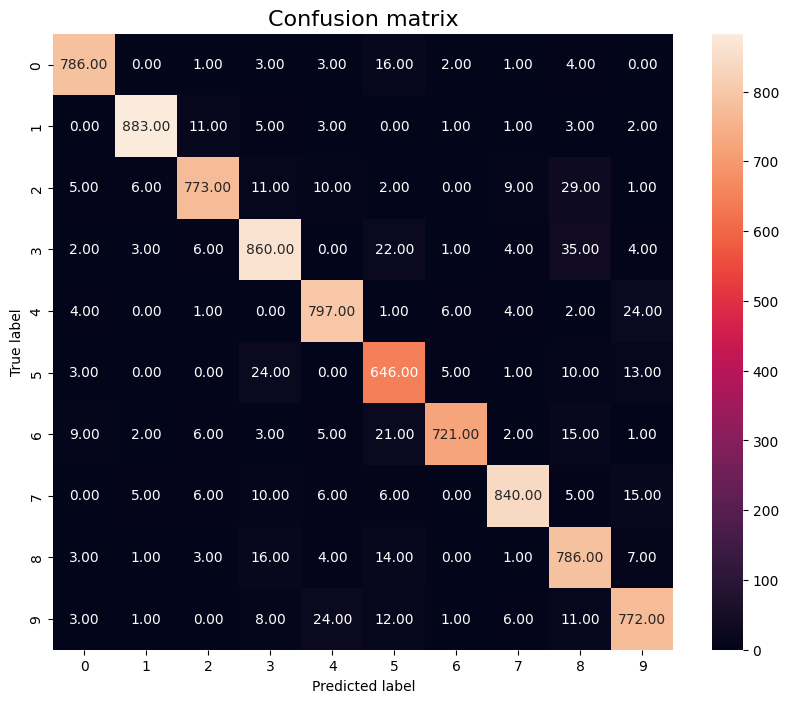

In [69]:
plot_confustion_matrix(y_actual_classes, y_pred_classes)

In [70]:
from sklearn.metrics import classification_report, accuracy_score

In [71]:
print(classification_report(y_actual_classes, y_pred_classes))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       816
           1       0.98      0.97      0.98       909
           2       0.96      0.91      0.94       846
           3       0.91      0.92      0.92       937
           4       0.94      0.95      0.94       839
           5       0.87      0.92      0.90       702
           6       0.98      0.92      0.95       785
           7       0.97      0.94      0.95       893
           8       0.87      0.94      0.91       835
           9       0.92      0.92      0.92       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400



In [72]:
accuracy_score(y_actual_classes, y_pred_classes)

0.9361904761904762

## Participant Exercise - 1: 
- Add one more layers with 128 neurons
- Change activation functions

# Convolution Neural Networks (CNN)
## What is Convolution?

- Filter
- Kernel Size

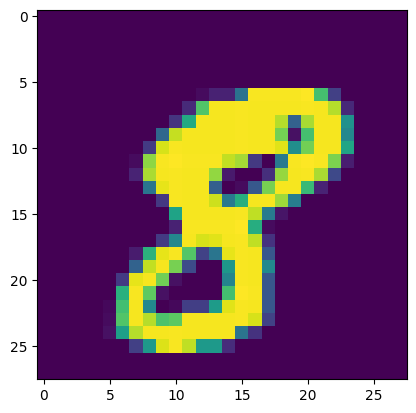

In [73]:
plt.grid(False)
plt.imshow( image_buffer[10].reshape(28, 28));

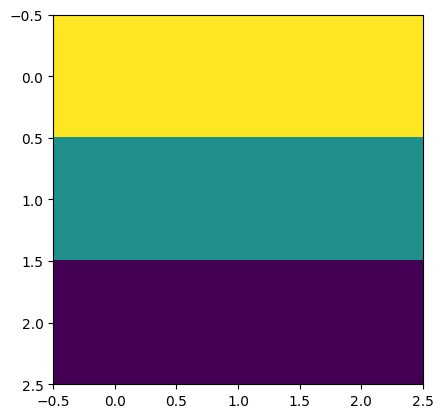

In [74]:
top=[[ 1, 1, 1],
     [ 0, 0, 0],     
     [ -1, -1, -1]]
plt.grid(False)
plt.imshow(top);

In [75]:
from scipy.ndimage.filters import correlate, convolve

<ipython-input-75-cc79ba87dc5a>:1: DeprecationWarning: Please use `correlate` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import correlate, convolve
<ipython-input-75-cc79ba87dc5a>:1: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import correlate, convolve


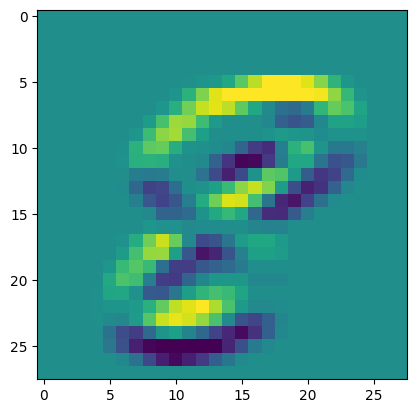

In [76]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   top)
plt.grid(False)
plt.imshow(convtop);

In [77]:
np.rot90(top, 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

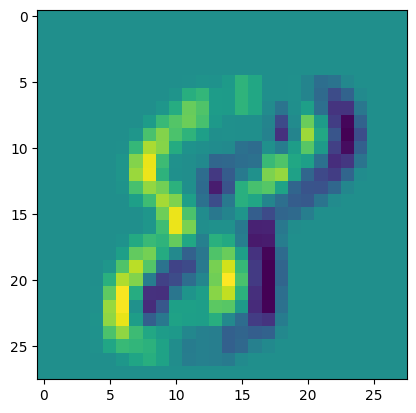

In [78]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   np.rot90(top, 1))
plt.grid(False)
plt.imshow(convtop);

## CNN Model

- Strides
- Padding
- MaxPooling

In [79]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [80]:
X_train_shape = X_train.shape
print(X_train_shape)

(33600, 28, 28)


In [81]:
X_test_shape = X_test.shape
print(X_test_shape)

(8400, 28, 28)


In [82]:
X_train_reshaped = X_train.reshape(X_train_shape[0],
                                   X_train_shape[1],
                                   X_train_shape[2], 1)

X_test_reshaped = X_test.reshape(X_test_shape[0],
                                 X_test_shape[1],
                                 X_test_shape[2], 1)

In [83]:
X_train_reshaped.shape

(33600, 28, 28, 1)

In [84]:
new_input_shape = (X_train_shape[1],X_train_shape[2], 1)

In [85]:
new_input_shape

(28, 28, 1)

### Model 1 

- Conv2D -> Dense(10) -> Softmax

In [86]:
tf.keras.backend.clear_session() # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model.add(Activation('relu'))
                            
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [87]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 activation (Activation)     (None, 26, 26, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 10)                13530     
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                        

In [88]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [89]:
%%time

history = model.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/20
263/263 [==============================] - 11s 38ms/step - loss: 3.4031 - accuracy: 0.8426 - val_loss: 0.8048 - val_accuracy: 0.9295
Epoch 2/20
263/263 [==============================] - 9s 33ms/step - loss: 0.4900 - accuracy: 0.9456 - val_loss: 0.4289 - val_accuracy: 0.9512
Epoch 3/20
263/263 [==============================] - 11s 40ms/step - loss: 0.2627 - accuracy: 0.9617 - val_loss: 0.3222 - val_accuracy: 0.9575
Epoch 4/20
263/263 [==============================] - 10s 39ms/step - loss: 0.1655 - accuracy: 0.9718 - val_loss: 0.3093 - val_accuracy: 0.9587
Epoch 5/20
263/263 [==============================] - 8s 30ms/step - loss: 0.1204 - accuracy: 0.9765 - val_loss: 0.2622 - val_accuracy: 0.9611
Epoch 6/20
263/263 [==============================] - 10s 38ms/step - loss: 0.0921 - accuracy: 0.9799 - val_loss: 0.2582 - val_accuracy: 0.9602
Epoch 7/20
263/263 [==============================] - 11s 42ms/step - loss: 0.0692 - accuracy: 0.9834 - val_loss: 0.2449 - val_accuracy: 0

### Plotting Loss and Accuracy

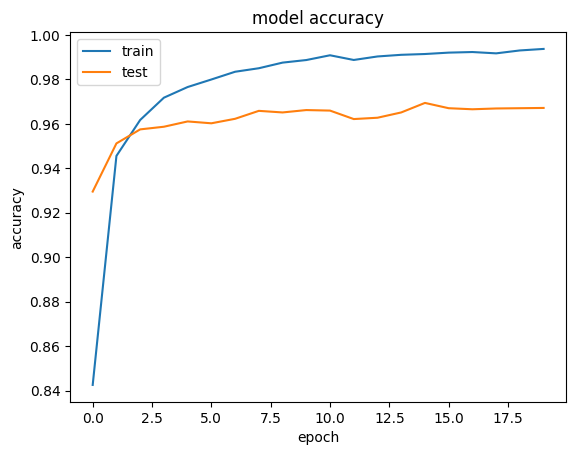

In [90]:
plot_train_val_accuracy(history.history)

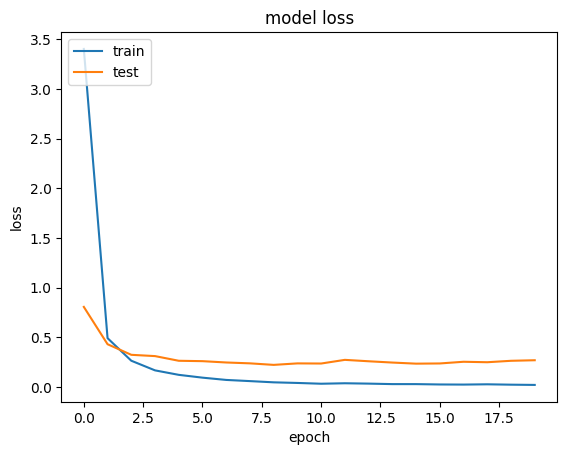

In [91]:
plot_train_val_loss(history.history)

### Model 2:

- Conv2D -> MaxPool() -> Dense(32) -> Dense(10) -> Softmax

In [92]:
tf.keras.backend.clear_session() # clear default graph

model2 = Sequential()
model2.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model2.add(Activation('relu'))
                            
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(32))    
model2.add(Activation('relu'))

model2.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model2.add(Activation('softmax'))

In [93]:
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 8)         80        
                                                                 
 activation (Activation)     (None, 26, 26, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1352)              0         
                                                                 
 dense (Dense)               (None, 32)                43296     
                                                                 
 activation_1 (Activation)   (None, 32)                0         
                                                        

In [94]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [95]:
BATCH_SIZE = 64
EPOCHS = 10

In [96]:
%%time

history2 = model2.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 17s 27ms/step - loss: 1.2198 - accuracy: 0.7063 - val_loss: 0.4754 - val_accuracy: 0.8901
Epoch 2/10
525/525 [==============================] - 12s 22ms/step - loss: 0.3251 - accuracy: 0.9222 - val_loss: 0.2548 - val_accuracy: 0.9381
Epoch 3/10
525/525 [==============================] - 12s 23ms/step - loss: 0.1882 - accuracy: 0.9484 - val_loss: 0.1933 - val_accuracy: 0.9521
Epoch 4/10
525/525 [==============================] - 9s 17ms/step - loss: 0.1332 - accuracy: 0.9619 - val_loss: 0.1640 - val_accuracy: 0.9601
Epoch 5/10
525/525 [==============================] - 11s 21ms/step - loss: 0.1014 - accuracy: 0.9697 - val_loss: 0.1473 - val_accuracy: 0.9619
Epoch 6/10
525/525 [==============================] - 11s 21ms/step - loss: 0.0776 - accuracy: 0.9757 - val_loss: 0.1388 - val_accuracy: 0.9663
Epoch 7/10
525/525 [==============================] - 11s 21ms/step - loss: 0.0687 - accuracy: 0.9782 - val_loss: 0.1320 - val_accuracy: 

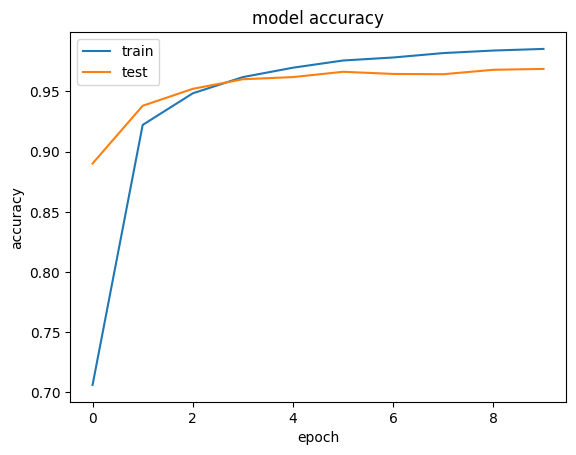

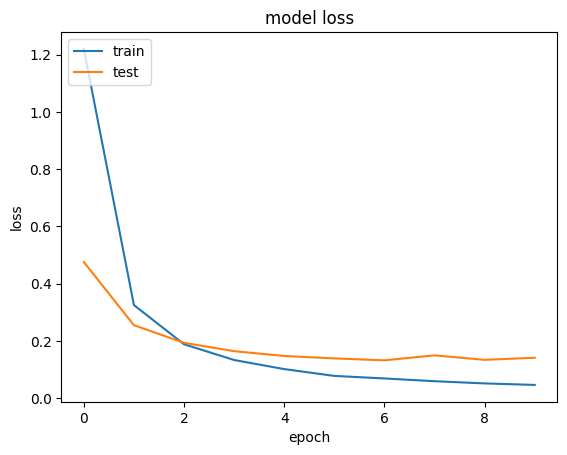

In [97]:
plot_train_val_accuracy(history2.history)

plot_train_val_loss(history2.history)

### Model Accuarcy:

In [100]:
X_train_reshaped.shape

(33600, 28, 28, 1)

263/263 [==============================] - 2s 8ms/step


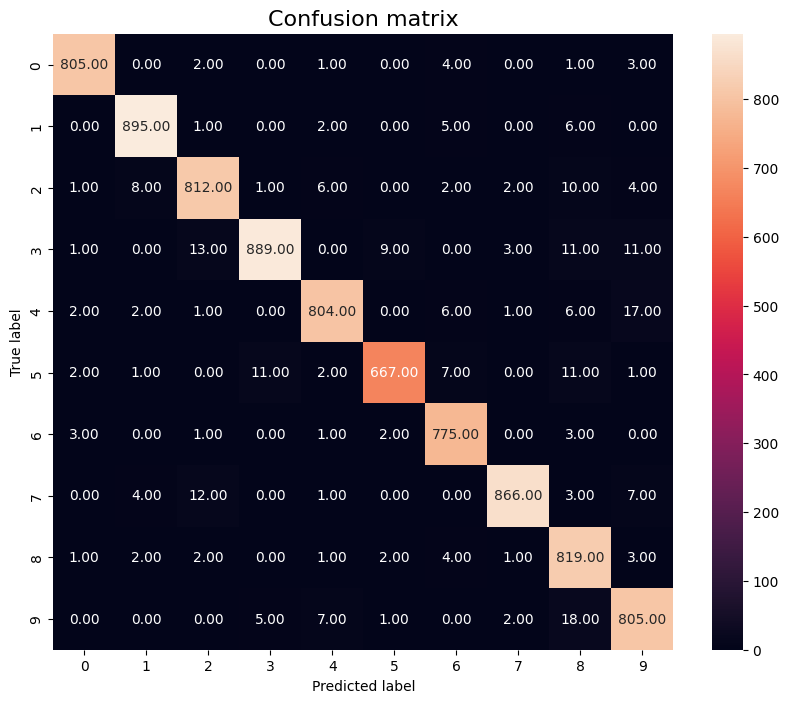

In [99]:
predictions = model2.predict(X_test_reshaped)
predictions_2 = np.argmax(predictions, axis=1)

predictions_2 = list(predictions_2)
plot_confustion_matrix(y_actual_classes, predictions_2)

In [101]:
print(classification_report(y_actual_classes, predictions_2))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       816
           1       0.98      0.98      0.98       909
           2       0.96      0.96      0.96       846
           3       0.98      0.95      0.96       937
           4       0.97      0.96      0.97       839
           5       0.98      0.95      0.96       702
           6       0.97      0.99      0.98       785
           7       0.99      0.97      0.98       893
           8       0.92      0.98      0.95       835
           9       0.95      0.96      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



In [102]:
from sklearn import metrics

In [103]:
metrics.accuracy_score(predictions_2, 
                       y_actual_classes)

0.9686904761904762

## Participant Exercise - 2:

1. Add more convolution layer and max pooling (Compare the number of parameters and accuracy0

2. Add more Hidden Layers

Run 10 epochs and print the model summary and the validation accuracy at the end of last epoch.

## Saving Model

In [109]:
model2.save('digits_model_2.h5')

In [ ]:
!ls -al

total 6672
drwxr-xr-x  14 manaranjan  staff      476 Aug 29 14:34 .
drwxr-xr-x   7 manaranjan  staff      238 Aug 28 20:45 ..
-rw-r--r--@  1 manaranjan  staff     6148 Aug 29 09:56 .DS_Store
drwxr-xr-x   6 manaranjan  staff      204 Aug 29 10:29 .ipynb_checkpoints
-rw-r--r--@  1 manaranjan  staff   110076 Aug 23 17:04 Boston House - NN Model 1.0.ipynb
-rw-r--r--   1 manaranjan  staff   583461 Aug 29 09:55 House_Price_Analysis_New_2.0.ipynb
-rw-r--r--@  1 manaranjan  staff   305224 Aug 23 17:03 IMDB Classification - BoW and Embeddings.ipynb
-rw-r--r--@  1 manaranjan  staff   105856 Aug 23 17:04 IMDB Classification - Sequence Modelling.ipynb
-rw-r--r--@  1 manaranjan  staff   259018 Aug 29 14:32 MNIST Digit Classification.ipynb
-rw-r--r--@  1 manaranjan  staff   231804 Aug 29 10:20 Scania Truck Failure Prediction 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff    30151 Aug 29 10:27 Sentiment Analysis 1.0.ipynb
-rw-r--r--@  1 manaranjan  staff  1631699 Aug 23 17:20 Tomato+Transfer+Learning+-+B

## Load model and make prediction

In [110]:
from keras.models import load_model

new_model = load_model('digits_model_2.h5')

In [113]:
predictions_new = new_model.predict(X_test_reshaped)
predictions_new_labels = np.argmax(predictions, axis=1)

263/263 [==============================] - 2s 6ms/step


In [114]:
predictions_new_labels[0:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1])

### Dive Deeper into the Model Weights

In [115]:
weights = model2.get_weights()

#### Checking the weights metrics dimensions

In [116]:
weights[0].shape

(3, 3, 1, 8)

In [117]:
weights[1].shape

(8,)

In [118]:
weights[2].shape

(1352, 32)

In [119]:
weights[3].shape

(32,)

In [120]:
weights[4].shape

(32, 10)

#### Get the first filter in first convolution layer

In [121]:
filter1 = weights[0][:,:,:,0:1].reshape(3, 3)

In [122]:
filter1

array([[ 0.0767,  0.1394,  0.0292],
       [-0.1041, -0.2496, -0.2539],
       [-0.191 ,  0.1841,  0.0696]], dtype=float32)

#### Applying the convolutions to one image

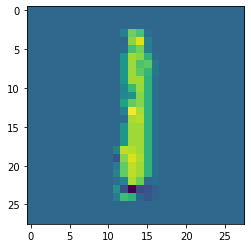

In [ ]:
convtop = convolve(image_buffer[2].reshape(28, 28), 
                   filter1)
plt.grid(False)
plt.imshow(convtop);